In [24]:
if __name__ == '__main__':
    import numpy as np
    np.random.seed(8889)
    from random import shuffle
    from sklearn.metrics import adjusted_rand_score
    from sklearn.cluster import KMeans
    from graspy.embed import MultipleASE
    from graspy.simulations import sbm
    from graspy.plot import heatmap, pairplot

(200, 2)


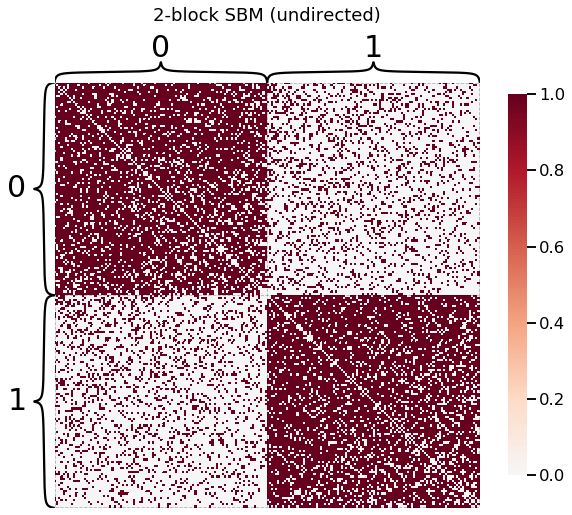

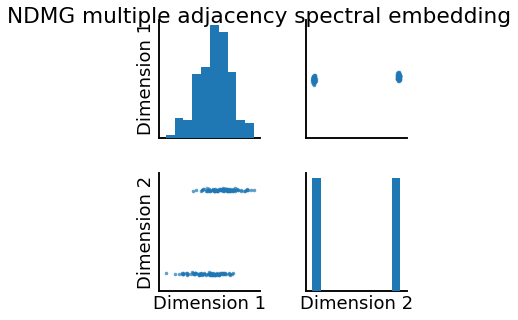

In [96]:
    n_verts = 100
    p = 0.8
    #p2 = 0.8
    labels_sbm = n_verts * [0] + n_verts * [1]
    P = np.array([[p, 1.0-p], [1.0-p, p]])
    #P2 = np.array([[p2, 1.0-p2], [1.0-p2, p2]])
    undirected_sbms = []
    #undirected_sbms2 = []
    %matplotlib inline
    for i in range(32):
        undirected_sbms.append(sbm(2 * [n_verts], P))
    #for i in range(32):
    #    undirected_sbms2.append(sbm(2 * [n_verts], P2))
    heatmap(undirected_sbms[2], title='2-block SBM (undirected)', inner_hier_labels=labels_sbm)
    #shuffle(undirected_sbms)
    labels = labels_sbm#[0]*n_verts*2 + [1]*n_verts*2
    mase = MultipleASE(n_components=2, algorithm='full')
    Xhat = mase.fit_transform(undirected_sbms)
    #Xhat2 = mase.fit_transform(undirected_sbms2)
    #print(Xhat1.shape)
    #print(Xhat2.shape)
    #Xhat = Xhat2#np.concatenate([Xhat1, Xhat2], axis=0)
    pairplot(Xhat, title='NDMG multiple adjacency spectral embedding')
    print(Xhat.shape)

In [97]:
    from sklearn.svm import SVC
    #labels = np.array(labels)
    clf = SVC(gamma = 'scale', kernel = 'linear') 
    sc =clf.fit(Xhat, labels)

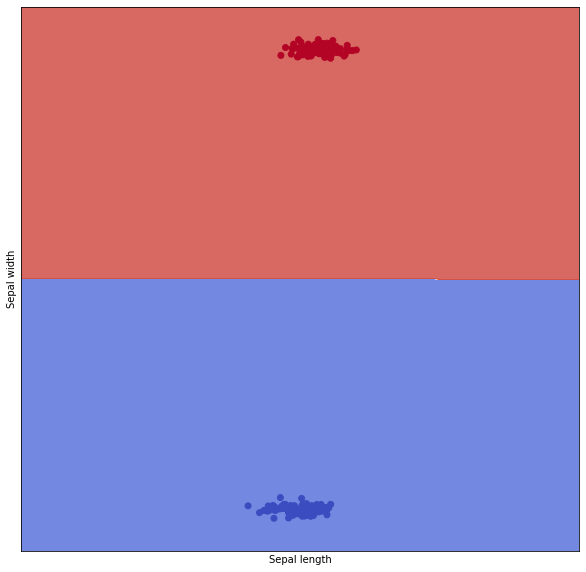

In [99]:
    h = 0.0002
    x_min, x_max = Xhat[:, 0].min() - 0.01, Xhat[:, 0].max() + 0.01
    y_min, y_max = Xhat[:, 1].min() - 0.01, Xhat[:, 1].max() + 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    import matplotlib.pyplot as plt
#for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplots(figsize=(10, 10))
    #plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(Xhat[:, 0], Xhat[:, 1], c=labels, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    #plt.title(titles[i])

    plt.show()
